In [1]:
from qiskit import *
from qiskit.visualization import plot_state_city

In [2]:
# Riddle 1: The treasure door
# A treasure is hidden behind one of the 2 doors.
# A guard stands in front of each door, one is lying, the other is telling the truth, but we don't know which.
# Which door would the other guard tell me not to take?

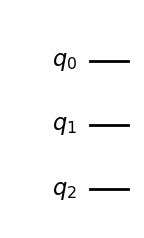

In [3]:
# We start by implementing the initial riddle (without resolving it)
# We need 3 qubits in total (2 for the 2 guardians' answers and 1 to indicate which guardian is lying)
circ = QuantumCircuit(3)
circ.draw('mpl')

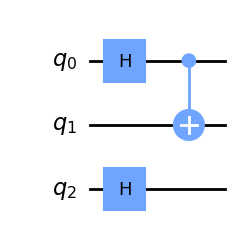

In [4]:
# Since the qubits are initialized to 0, we need to apply a hadamard gate to superimpose the 0 and 1 states, so that we don't know "behind which gate the treasure is".
# As soon as we open one gate, we immediately know the result of the other gate, so we'll intricate the first 2 qubits with the CNOT gate so that the 2 qubits give the same result.
# Similarly for the lie qubit, we don't know which guard is lying, so we'll apply the hadamard gate to superimpose the 0 and 1 states.
circ.h(0)
circ.cx(0,1)
circ.h(2)
circ.draw('mpl')

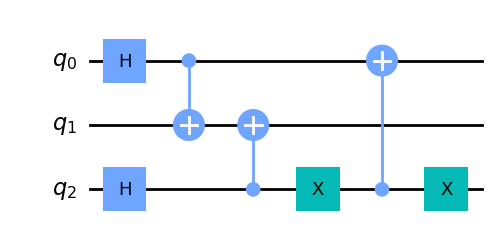

In [5]:
# Now we want to reverse the response of the lying guard => lie circuit
# CNOT reverses the answer if the qubit is 1 and does nothing if it is 0. We'll say that if q2 = 1 then q1 is lying and if q2 = 0 it's q0.
circ.cx(2,1)

circ.x(2)
circ.cx(2,0)

circ.x(2)
circ.draw('mpl')

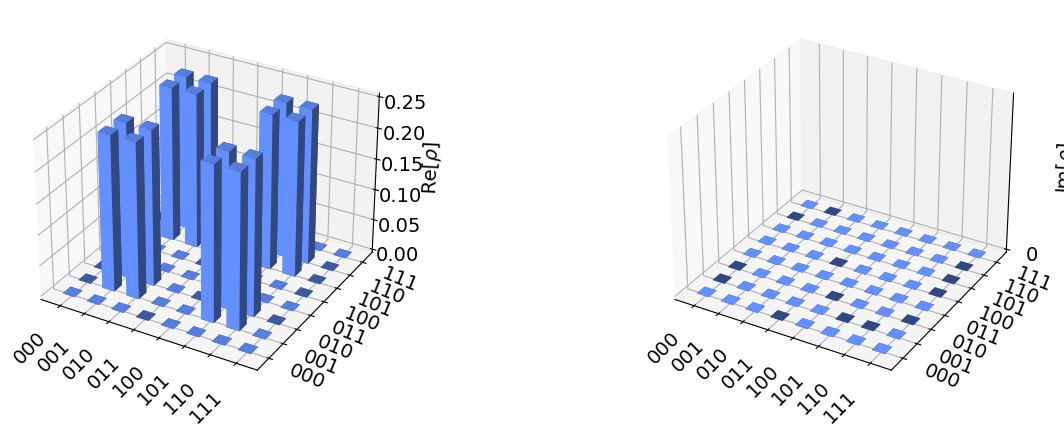

In [6]:
# We have 4 possibilities: 2 possiblities for the treasure * 2 possibilities of lying with an inverse result for the 2 guardians (q0 and q1)
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)
plot_state_city(outputstate)

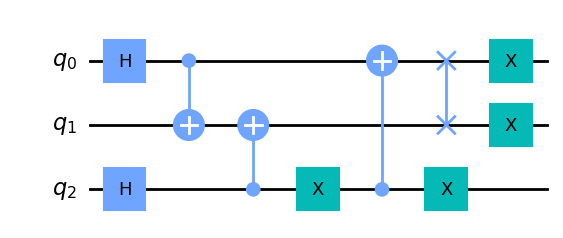

In [7]:
# Now we'll implement the solution to the riddle
# We'll use the swap gate to retrieve the answer from the other gatekeeper, to which we'll apply the NOT gate to obtain the answer to which gate not to take.
circ.swap(0, 1)
circ.x(0)
circ.x(1)
circ.draw('mpl')

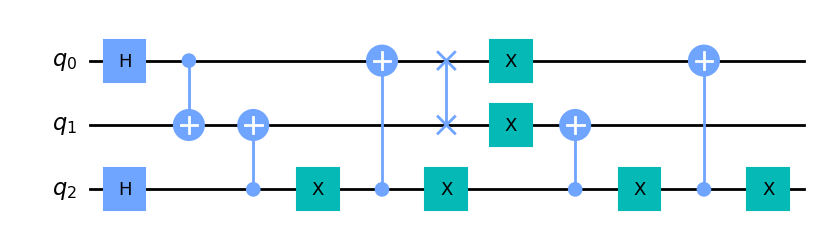

In [8]:
# Asking the guardian to question the other guardian triggers the lie circuit again, allowing us to cancel it by implementing it once again.
circ.cx(2,1)

circ.x(2)
circ.cx(2,0)

circ.x(2)
circ.draw('mpl')

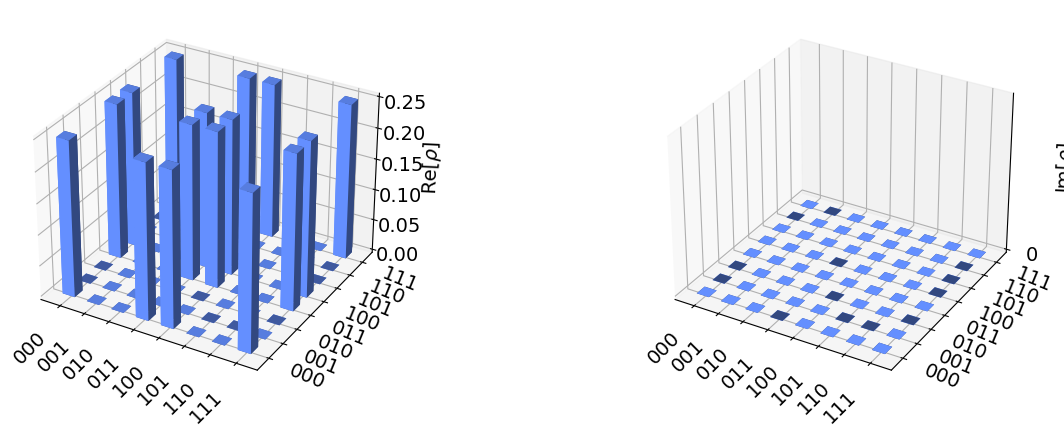

In [9]:
# We still have 4 possibilities: 2 possiblities for the treasure * 2 possibilities of lying with an inverse result for the 2 guardians (q0 and q1)
# But this time the 2 guardians q0 and q1 give the same result
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)
plot_state_city(outputstate)